In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

Problem Statement:<br>
Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain
optimum number of clusters and check whether we have obtained same number of clusters with the original data
(class column we have ignored at the begining who shows it has 3 clusters)df


In [ ]:
data=pd.read_csv('wine (1).csv')
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
data.shape

(178, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
features=data.iloc[:,1:]

In [ ]:
features.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


### Clustering before applying PCA

In [ ]:
#Features are correlated before apllying PCA

In [ ]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)

In [ ]:
scaled_features

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [ ]:
scaled_features.shape

(178, 13)

In [ ]:
pca=PCA()
new_features=pca.fit_transform(scaled_features)

In [ ]:
new_features

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [ ]:
np.round(pca.explained_variance_ratio_,2)

array([0.41, 0.19, 0.09, 0.07, 0.06, 0.05, 0.04, 0.02, 0.02, 0.02, 0.01,
       0.01, 0.01])

In [ ]:
#correlation of new_features
round(pd.DataFrame(new_features).corr(),3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
1,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
2,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
3,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
4,0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
6,0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
7,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0
8,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0
9,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0


In [ ]:
final_features=pd.DataFrame(new_features).iloc[:,0:3]
final_features

,0,1,2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


### Clustering using Hierarchical Clustering Technique

In [ ]:
model_h=AgglomerativeClustering(n_clusters=3,affinity='l2',linkage='complete')
model_h.fit_predict(new_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

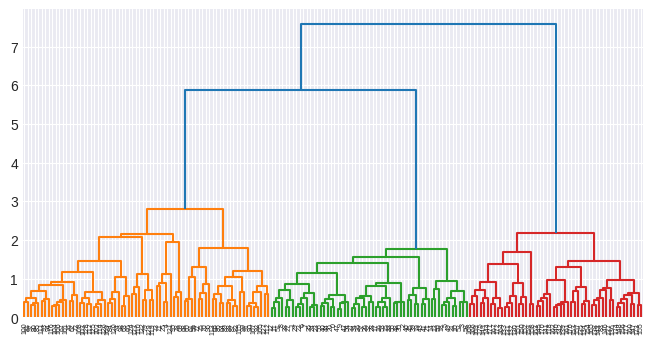

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import pdist

xdist=pdist(new_features,metric='euclidean')
linked=linkage(xdist,'ward')

plt.figure(figsize=(8,4))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show();

### K-Means Clustering

In [ ]:
model_k=KMeans(n_clusters=3)
model_k.fit_predict(new_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
model_k.cluster_centers_

array([[-3.59163245e-02,  3.70723630e-01,  2.77544594e-02,
         2.42750977e-02,  1.24550167e-02,  3.49799226e-02,
        -4.77114313e-03,  8.81354429e-03, -4.80896828e-04,
        -8.96648825e-03,  8.25446837e-03,  5.15021107e-03,
         2.86070307e-03],
       [ 5.80246303e-01, -1.90275446e-01, -2.76780509e-02,
         2.04475426e-03,  1.70193737e-02,  1.21730264e-02,
        -6.16298826e-03, -4.42008502e-03,  8.04028127e-03,
        -8.16781297e-04, -4.25637083e-03,  3.02153071e-03,
        -7.83224841e-03],
       [-4.86667780e-01, -2.05241238e-01, -3.25383090e-03,
        -2.65166810e-02, -2.80045342e-02, -4.65290435e-02,
         1.04061513e-02, -4.97270606e-03, -6.76065355e-03,
         9.84992201e-03, -4.55207612e-03, -7.95897173e-03,
         4.15426349e-03]])

### Evaluation<br>
Elbow Method for kmean clustering

In [ ]:
k=[]

for i in range(1,11):
  model=KMeans(n_clusters=i)
  model.fit(final_features)
  k.append(model.inertia_)

k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[65.27680504589114,
 34.294639587969556,
 18.938260830466426,
 15.69210572099745,
 13.490825944641706,
 11.682703799238297,
 10.368948499551209,
 9.44703455643326,
 8.672910866689815,
 8.145108076103202]

<ipython-input-18-7f55883dcd45>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


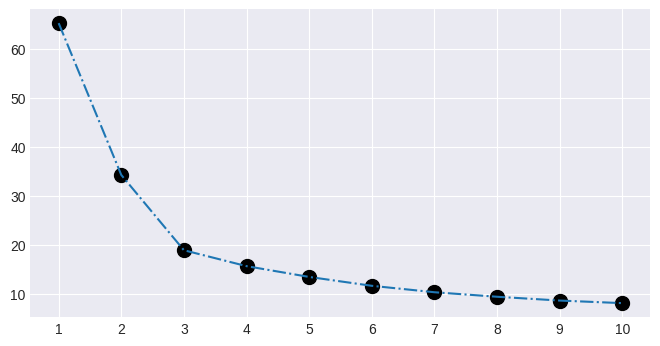

In [ ]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(range(1,11),k,s=100,color='black')
plt.plot(range(1,11),k,linestyle='-.')
plt.xticks(range(1,11))
plt.show();

In [33]:
#Elbow point is at 3

### **2: Silhouette Method for all Clustering techniques**

In [ ]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

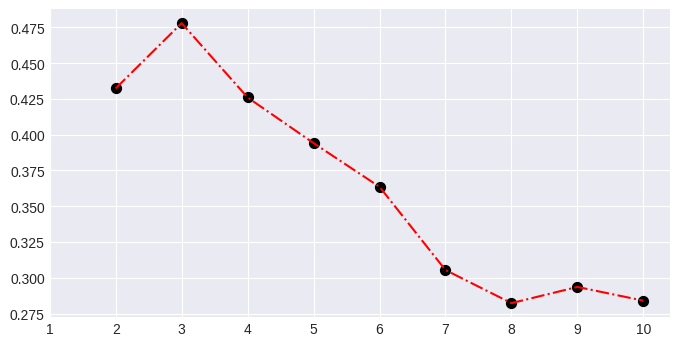

0.47796626568347655 for 3 clusters


[0.43235189362905235,
 0.47796626568347655,
 0.4260084778800526,
 0.3941112352459944,
 0.3635373156183171,
 0.30537183686934605,
 0.28224797369688837,
 0.2935650898978379,
 0.28398841694810656]

In [ ]:
#for KMean clustering technique

nc=range(2,11)
l=[]
for i in nc:
  model=KMeans(n_clusters=i)
  #model.fit_predict(scaled_fearures)
  l.append(silhouette_score(final_features,model.fit_predict(final_features)))



#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();

# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

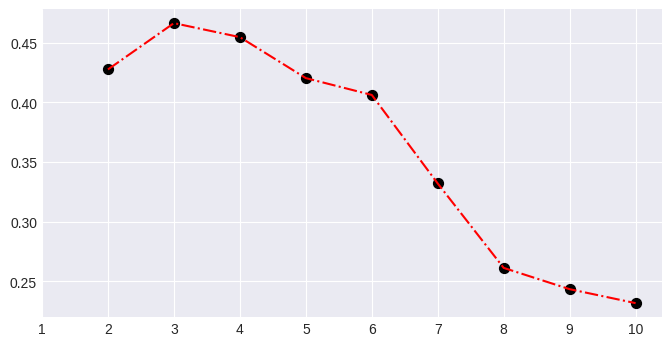

0.4664554877790764 for 3 clusters


[0.42761758661440263,
 0.4664554877790764,
 0.45472973778414066,
 0.4203741980545537,
 0.4062524938183359,
 0.3320269556347126,
 0.2612462911665593,
 0.24340079676922277,
 0.2316989589070199]

In [ ]:
#for hierarchical clustering technique with affinity='l1'and linkage='average'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='average')
  l.append(silhouette_score(final_features,model.fit_predict(final_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

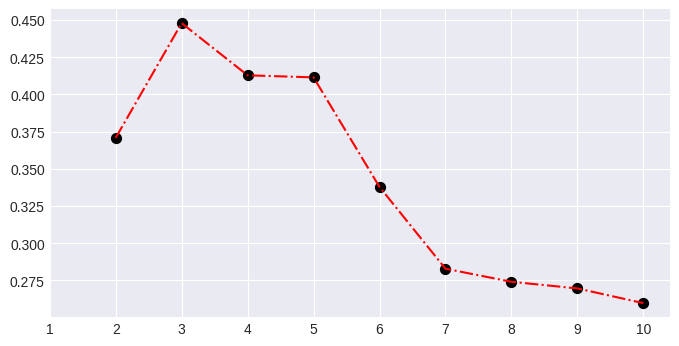

0.4478886204862951 for 3 clusters


[0.3707653941390381,
 0.4478886204862951,
 0.4128188397565742,
 0.41142419033704336,
 0.33774950889447825,
 0.2828040965019644,
 0.2740193192842315,
 0.2695578137820967,
 0.2596687366951846]

In [ ]:
#for hierarchical clustering technique with affinity='l1'and linkage='complete'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l1',linkage='complete')
  l.append(silhouette_score(final_features,model.fit_predict(final_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

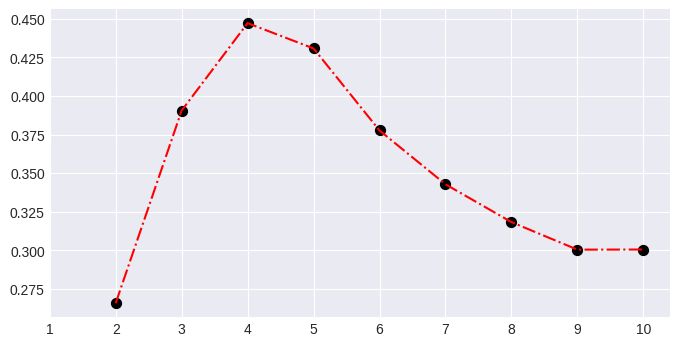

0.44723850921169317 for 4 clusters


[0.26571303050122924,
 0.3905447482849228,
 0.44723850921169317,
 0.4308322131648259,
 0.37763675109919553,
 0.34275816169199497,
 0.3182445027333518,
 0.3003859377267027,
 0.300475909207844]

In [ ]:
#for hierarchical clustering technique with affinity='l2'and linkage='average'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='average')
  l.append(silhouette_score(final_features,model.fit_predict(final_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

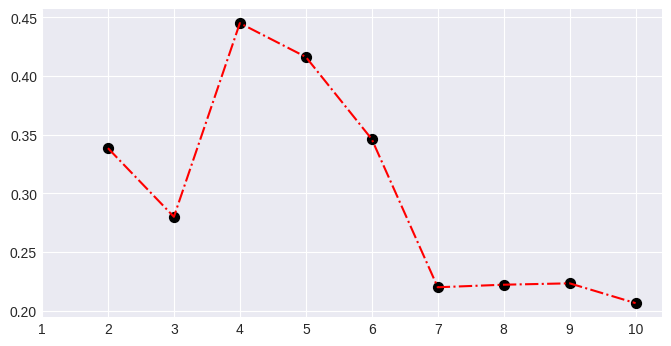

0.445101756583814 for 4 clusters


[0.3385358273079748,
 0.2800601589658387,
 0.445101756583814,
 0.4162897251524477,
 0.346212424879303,
 0.21998955478429816,
 0.22216806332126374,
 0.22333782916213668,
 0.2064572754282352]

In [ ]:
#for hierarchical clustering technique with affinity='l2'and linkage='complete'

nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage='complete')
  l.append(silhouette_score(final_features,model.fit_predict(final_features)))


#plotting
plt.figure(figsize=(8,4))
plt.style.use('seaborn-darkgrid')
plt.scatter(nc,l,s=50,color='black')
plt.plot(nc,l,color='red',linestyle='-.')
plt.xticks(range(1,11))
plt.show();




# printing highest Silhouette score for the respective technique
print(max(l),'for',nc[l.index(max(l))],"clusters")

l

In [ ]:
#final 3 clusters should be made as silhotte score for kmean is
# highest between all of them and it is showing there should be  3 clustrs

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

encoded_data=LabelEncoder().fit_transform(data['Type'])

In [ ]:
encoded_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

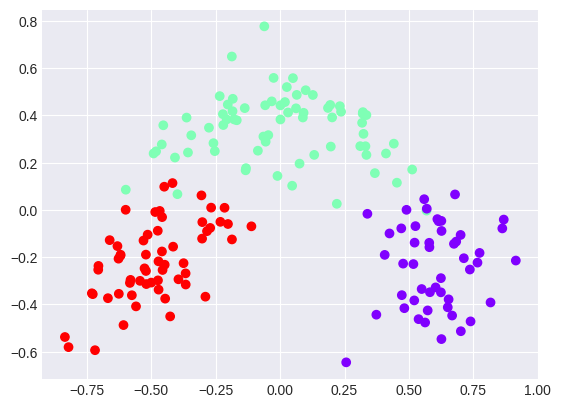

In [ ]:
plt.scatter(final_features.iloc[:,0],final_features.iloc[:,1],c=encoded_data,cmap=plt.cm.rainbow_r)